# Greenclassify: Deep Learning-Based Approach For Vegetable Image Classification
Vegetable Image Classification with Convolutional Neural Networks (CNN) utilizes cutting-edge deep learning to classify and identify diverse vegetables based on their visual attributes. CNNs are specialized neural networks tailored for image pattern recognition. The journey starts with a comprehensive dataset of vegetable images meticulously labeled by their specific types. Our CNN model learns to discern crucial features and patterns within these images through a series of convolutional layers, pooling operations, and activation functions. These convolutional layers employ small filters to scan the input image, capturing intricate details such as edges, textures, and shapes, ultimately enabling precise vegetable identification.

### Installing the dataset from kaggle using the API

In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
!kaggle datasets download -d misrakahmed/vegetable-image-dataset

100% 534M/534M [00:19<00:00, 27.0MB/s]
100% 534M/534M [00:19<00:00, 29.1MB/s]


### Unzipping the dataset using unzip command

In [5]:
!unzip /content/vegetable-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Vegetable Images/train/Radish/0001.jpg  
  inflating: Vegetable Images/train/Radish/0002.jpg  
  inflating: Vegetable Images/train/Radish/0003.jpg  
  inflating: Vegetable Images/train/Radish/0004.jpg  
  inflating: Vegetable Images/train/Radish/0005.jpg  
  inflating: Vegetable Images/train/Radish/0006.jpg  
  inflating: Vegetable Images/train/Radish/0007.jpg  
  inflating: Vegetable Images/train/Radish/0008.jpg  
  inflating: Vegetable Images/train/Radish/0009.jpg  
  inflating: Vegetable Images/train/Radish/0010.jpg  
  inflating: Vegetable Images/train/Radish/0011.jpg  
  inflating: Vegetable Images/train/Radish/0012.jpg  
  inflating: Vegetable Images/train/Radish/0013.jpg  
  inflating: Vegetable Images/train/Radish/0014.jpg  
  inflating: Vegetable Images/train/Radish/0015.jpg  
  inflating: Vegetable Images/train/Radish/0016.jpg  
  inflating: Vegetable Images/train/Radish/0017.jpg  
  inflating: Vegetable Images/t

### Importing the libraries

In [6]:
# Import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os, shutil, math
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import confusion_matrix

### Visualize the Images

In [7]:
train_path = "/content/Vegetable Images/train"
test_path = "/content/Vegetable Images/test"
validation_path = "/content/Vegetable Images/validation"

image_categories = os.listdir("/content/Vegetable Images/train")

def plot_images(image_categories):

  # Create a figure
  plt.figure(figsize=(10, 7))
  for i, cat in enumerate(image_categories):
    # Load images for the ith directory
    image_path = train_path + '/' + cat
    images_in_folder = os.listdir(image_path)
    first_image_of_folder = images_in_folder[0]
    first_image_path = image_path + '/' + first_image_of_folder
    img = image.load_img(first_image_path)
    img_arr = image.img_to_array(img)/255.0

    plt.subplot(4, 4, i+1)
    plt.imshow(img_arr)
    plt.title(cat)
    plt.axis('off')

  plt.show()

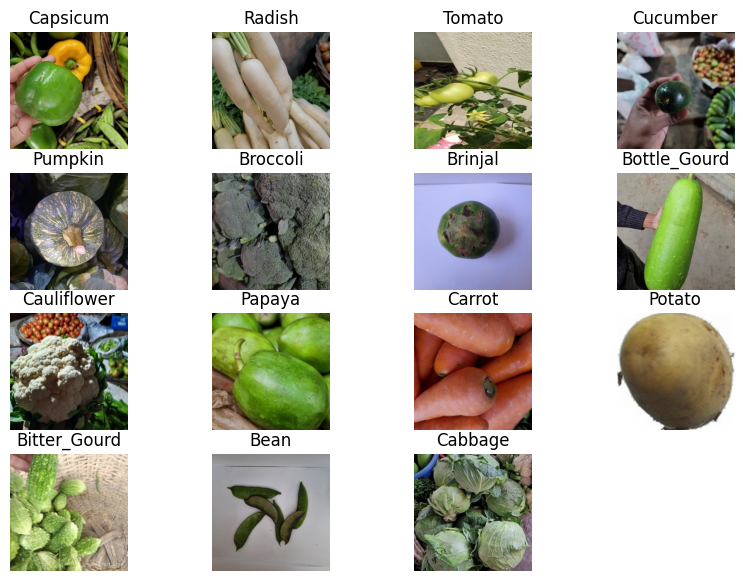

In [8]:
plot_images(image_categories)

### Data Augmentation
Data augmentation in deep learning for image classification, particularly when using TensorFlow, is a technique that involves applying various transformations to the training images to create new, slightly modified versions of the original data. The primary goal of data augmentation is to increase the diversity of the training dataset and help improve the model's generalization and robustness. It's especially useful when you have a limited amount of training data.

In [9]:
# For training data
train_datagen = ImageDataGenerator( rescale = 1.0/255.0, horizontal_flip=True )

# for validation
validation_datagen = ImageDataGenerator( rescale = 1.0/255.0)

# For testing data
test_datagen = ImageDataGenerator( rescale = 1.0/255.0)

### Preparing the data
Load and preprocess your data using the flow_from_directory method:
* 'your_dataset_directory' is the path to the directory where your dataset is stored. Make sure it follows the required structure with subdirectories for each class.
* target_size defines the dimensions to which all images will be resized.
* batch_size specifies the number of images in each batch.
* class_mode should be set based on your classification task. Use 'categorical' for multi-class classification or 'binary' for binary classification.

In [10]:
x_train = train_datagen.flow_from_directory(train_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')
x_validation = validation_datagen.flow_from_directory(validation_path,
                                                      target_size=(150,150),
                                                      batch_size=32,
                                                      class_mode='categorical')
x_test = test_datagen.flow_from_directory(test_path,
                                          target_size=(150,150),
                                          batch_size=32,
                                          class_mode='categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [11]:
# Printing the class encodings done by the generator
class_map = dict([(v, k) for k, v in x_train.class_indices.items()])
print(class_map)

{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


### Building a CNN model
Convolutional Neural Network (CNN) model for image classification using TensorFlow. Begin by importing the required libraries, then prepare your image data using the ImageDataGenerator and flow_from_directory. Create the CNN model architecture with convolutional and pooling layers, compile it with an optimizer and loss function, and train the model on your prepared data. After training, evaluate its performance on a test dataset. Fine-tune the model as needed for better results, and when satisfied, save the model for deployment. Adapt the model to your specific image classification problem by adjusting parameters such as the number of classes, image dimensions, and architecture.

In [12]:
# Build a custom sequential CNN model
model = Sequential() # model object

# Add layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same',activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3,strides=1,padding='same', activation='relu'))
model.add(MaxPooling2D(2))

# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 128)               1

### Compile and fit the model

In [13]:
early_stop = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
hist = model.fit(x_train, epochs=100,verbose = 1, validation_data = x_validation,
                 steps_per_epoch = len(x_train), validation_steps = len(x_validation),
                 callbacks=early_stop)

Epoch 1/100
469/469 [==============================] - 43s 58ms/step - loss: 1.4394 - accuracy: 0.5131 - val_loss: 0.8497 - val_accuracy: 0.7387
Epoch 2/100
469/469 [==============================] - 29s 61ms/step - loss: 0.7354 - accuracy: 0.7602 - val_loss: 0.5277 - val_accuracy: 0.8387
Epoch 3/100
469/469 [==============================] - 29s 62ms/step - loss: 0.4964 - accuracy: 0.8394 - val_loss: 0.3459 - val_accuracy: 0.8987
Epoch 4/100
469/469 [==============================] - 27s 57ms/step - loss: 0.3745 - accuracy: 0.8777 - val_loss: 0.3962 - val_accuracy: 0.8860
Epoch 5/100
469/469 [==============================] - 27s 57ms/step - loss: 0.3181 - accuracy: 0.8979 - val_loss: 0.2434 - val_accuracy: 0.9303
Epoch 6/100
469/469 [==============================] - 27s 58ms/step - loss: 0.2386 - accuracy: 0.9276 - val_loss: 0.2168 - val_accuracy: 0.9390
Epoch 7/100
469/469 [==============================] - 27s 58ms/step - loss: 0.1987 - accuracy: 0.9329 - val_loss: 0.2236 - val_ac

### Visualizing the loss and accuaracy of train and validation dataset

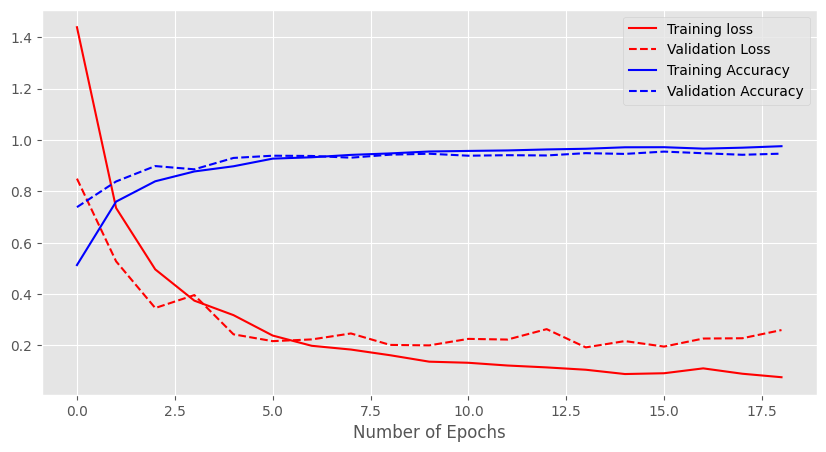

In [14]:
# Plot the error and accuracy
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

### visualize the results

In [15]:
model.evaluate(x_test)

94/94 [==============================] - 4s 39ms/step - loss: 0.2476 - accuracy: 0.9443


[0.24763067066669464, 0.9443333148956299]

### Saving the model

In [16]:
model.save('VegetableImageClassification.h5')

### Testing the model

In [17]:
# Function for testing the model and predicting the model
def generate_predictions(test_image_path, actual_label):

  # 1. Load and preprocess the image
  test_img = image.load_img(test_image_path, target_size=(150, 150))
  test_img_arr = image.img_to_array(test_img)/255.
  test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0],
                                         test_img_arr.shape[1], test_img_arr.shape[2]))

  # 2. Make Predictions
  predicted_label = np.argmax(model.predict(test_img_input))
  predicted_vegetable = class_map[predicted_label]
  plt.figure(figsize=(4, 4))
  plt.imshow(test_img_arr)
  plt.title("Predicted label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
  plt.grid()
  plt.axis('off')
  plt.show()

1/1 [==============================] - 0s 187ms/step


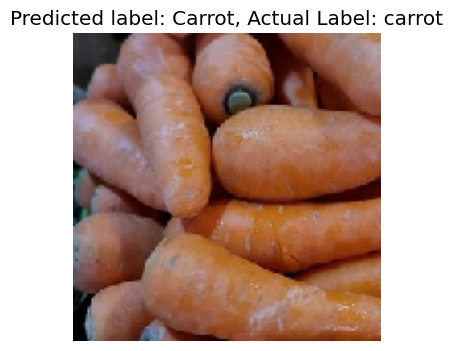

In [18]:
# Testing 1
test_image_path1 = '/content/Vegetable Images/train/Carrot/0004.jpg'
generate_predictions(test_image_path1, actual_label='carrot')

1/1 [==============================] - 0s 19ms/step


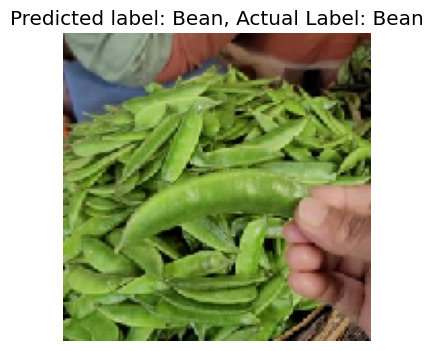

In [19]:
# Testing 2
test_image_path2 = '/content/Vegetable Images/train/Bean/0035.jpg'
generate_predictions(test_image_path2, actual_label = 'Bean')

1/1 [==============================] - 0s 18ms/step


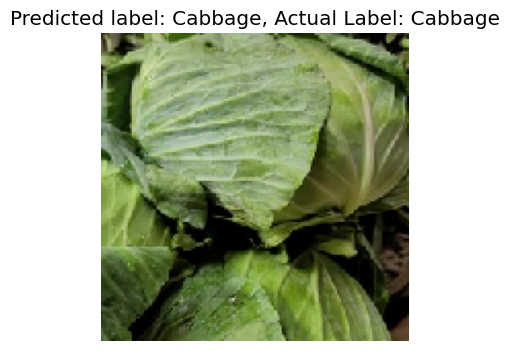

In [20]:
# Testing 3
test_image_path3 = '/content/Vegetable Images/train/Cabbage/0006.jpg'
generate_predictions(test_image_path3, actual_label = 'Cabbage')

In [21]:
# Testing 4
img = image.load_img('/content/Vegetable Images/train/Cabbage/0006.jpg', target_size=[150,150])
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
pred = np.argmax(model.predict(x))
op = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']
op[pred]

1/1 [==============================] - 0s 18ms/step


'Cabbage'

In [22]:
# Testing 5
img = image.load_img('/content/Vegetable Images/test/Capsicum/1003.jpg', target_size=[150,150])
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
pred = np.argmax(model.predict(x))
op = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']
op[pred]

1/1 [==============================] - 0s 18ms/step


'Capsicum'

In [23]:
# Testing 6
img = image.load_img('/content/Vegetable Images/validation/Carrot/1201.jpg', target_size=[150,150])
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
pred = np.argmax(model.predict(x))
op = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']
op[pred]

1/1 [==============================] - 0s 22ms/step


'Carrot'

### Evaluating the model

In [24]:
def labels_confusion_matrix(test_path):

    folder_path=test_path

    mapping={}
    for i,j in enumerate(sorted(os.listdir(folder_path))):
        mapping[j]=i

    files=[]
    real=[]
    predicted=[]

    for i in os.listdir(folder_path):

        true=os.path.join(folder_path,i)
        true=true.split('/')[-1]
        true=mapping[true]

        for j in os.listdir(os.path.join(folder_path,i)):

            img_ = image.load_img(os.path.join(folder_path,i,j), target_size=(150,150))
            img_array = image.img_to_array(img_)
            img_processed = np.expand_dims(img_array, axis=0)
            img_processed /= 255.
            prediction = model.predict(img_processed)
            index = np.argmax(prediction)

            predicted.append(index)
            real.append(true)

    return (real,predicted)

def print_confusion_matrix(real,predicted):
    total_output_labels = 15
    cmap="turbo"
    cm_plot_labels = [i for i in range(15)]

    cm = confusion_matrix(y_true=real, y_pred=predicted)
    df_cm = pd.DataFrame(cm,cm_plot_labels,cm_plot_labels)
    sns.set(font_scale=1.2) # for label size
    plt.figure(figsize = (10,7))
    s=sns.heatmap(df_cm,fmt="d", annot=True,cmap=cmap) # font size

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix.png')
    plt.show()

1/1 [==============================] - 0s 19ms/step


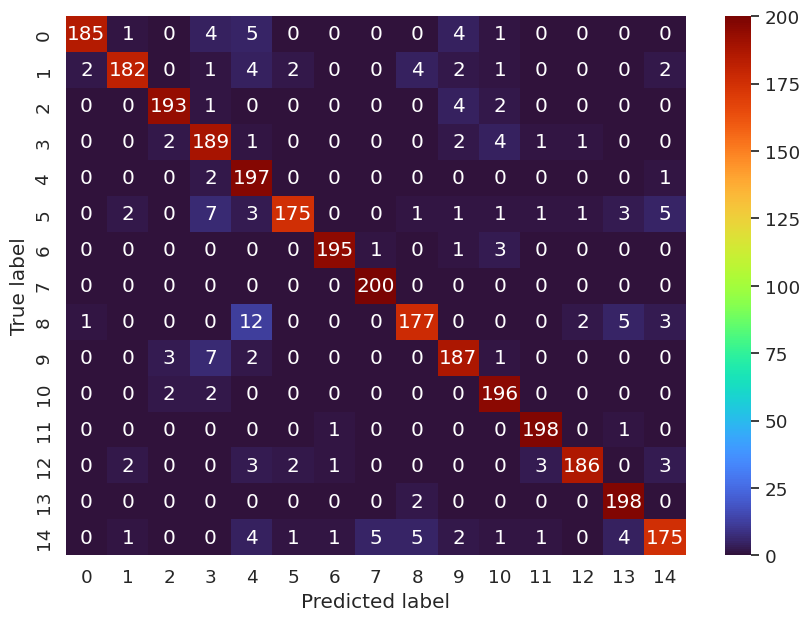

In [25]:
y_true,y_pred=labels_confusion_matrix(test_path)
print_confusion_matrix(y_true,y_pred)

In [26]:
def predict_dir(filedir, model):
  cols = 3
  pos = 0
  images = []
  total_images = len(os.listdir(filedir))
  rows = total_images//cols + 1

  true = filedir.split('/')[-1]

  for i in sorted(os.listdir(filedir)):
    images.append(os.path.join(filedir, i))

  for subplot, img1 in enumerate(images):
    img_ = image.load_img(img1, target_size=(150,150))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.
    prediction = model.predict(img_processed)
    index = np.argmax(prediction)

    pred = class_map.get(index)
    if pred == true:
      pos+=1
  acc = pos/total_images
  print("Accuracy for {original}: {:.2f} ({pos}/{total})".format(acc, pos=pos, total= total_images, original=true))

In [27]:
for i in os.listdir(test_path):
  predict_dir(os.path.join(test_path, i), model)

1/1 [==============================] - 0s 17ms/step
Accuracy for Capsicum: 0.97 (195/200)
1/1 [==============================] - 0s 26ms/step
Accuracy for Radish: 0.99 (198/200)
1/1 [==============================] - 0s 28ms/step
Accuracy for Tomato: 0.88 (175/200)
1/1 [==============================] - 0s 26ms/step
Accuracy for Cucumber: 0.94 (187/200)
1/1 [==============================] - 0s 27ms/step
Accuracy for Pumpkin: 0.93 (186/200)
1/1 [==============================] - 0s 27ms/step
Accuracy for Broccoli: 0.98 (197/200)
1/1 [==============================] - 0s 20ms/step
Accuracy for Brinjal: 0.94 (189/200)
1/1 [==============================] - 0s 37ms/step
Accuracy for Bottle_Gourd: 0.96 (193/200)
1/1 [==============================] - 0s 19ms/step
Accuracy for Cauliflower: 0.89 (177/200)
1/1 [==============================] - 0s 19ms/step
Accuracy for Papaya: 0.98 (196/200)
1/1 [==============================] - 0s 18ms/step
Accuracy for Carrot: 1.00 (200/200)
1/1 [========

Visualizing all incorrect images predicted for a particular vegetable category by our classifier.

In [28]:
def wrong_input_capture(test_category):
  a = os.path.basename(test_category)
  wrong_array = []
  for i in os.listdir(test_category):
    img1 = os.path.join(test_category, i)
    img_ = image.load_img( img1, target_size = (150, 150))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.
    prediction = model.predict(img_processed)

    index = np.argmax(prediction)
    pred = class_map.get(index)

    if not pred==a:
      wrong_array.append((img1, pred))

  return wrong_array

def visualize_wrong_input(images):

  fig = plt.figure(1, figsize= (10, 7))
  total_images = len(images)
  rows = math.ceil(float(total_images/3))
  for subplot, (image_path, predicted) in enumerate(images):
    img = plt.imread(image_path)
    fig = plt.subplot(rows, 3, subplot+1)
    fig.set_title("Predicted - {}".format(predicted), pad=10, size=18)
    plt.imshow(img)
  plt.tight_layout()

1/1 [==============================] - 0s 22ms/step


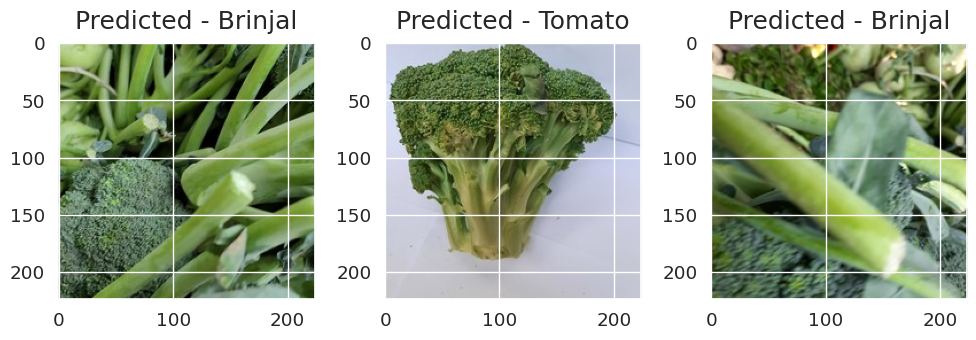

In [29]:
vegetable = "Broccoli"
path = os.path.join(test_path, vegetable)
images = wrong_input_capture(path)
visualize_wrong_input(images)